In [1]:
import os
os.chdir("/Users/suyoung/desktop/NO/project")

import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
np.set_printoptions(threshold=sys.maxsize)

#%load_ext autoreload
#%autoreload 2

from Newton import *
from Helpers import *
from Function import *
from Classifiers import *


## Data preparation

In [45]:
# Load the dataset (MNIST data)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Set number of data
trainnum = 400
testnum = 400

digit1 = 1
digit2 = 0

# Filter 0's and 1's
train_idx=[i for i, j in enumerate(y_train) if j == digit1 or j == digit2]
test_idx=[i for i, j in enumerate(y_test) if j == digit1 or j == digit2]
random.shuffle(train_idx)
random.shuffle(test_idx)
train_x = x_train[train_idx[:trainnum]]
test_x = x_test[test_idx[:testnum]]
train_x = train_x.reshape(trainnum,28*28)
test_x = test_x.reshape(testnum,28*28)
train_y = y_train[train_idx[:trainnum]]    
test_y = y_test[test_idx[:testnum]]

# Replace label to -1 and 1
train_y = np.where(train_y==digit1, -1, train_y) 
test_y = np.where(test_y==digit1, -1, test_y)

train_y = np.where(train_y==digit2, 1, train_y) 
test_y = np.where(test_y==digit2, 1, test_y)


# Normalize
train_x, test_x = prep_pixels(train_x,test_x)

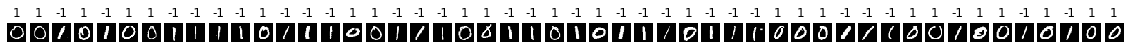

In [46]:
plt.figure(figsize=(20, 10))
for n in range(50):
    a = plt.subplot(1, 50, n+1)
    plt.imshow(test_x[n].reshape(28,28),
               interpolation="None",
               cmap='gray')
    a.set_title(test_y[n])
    plt.axis('off')
plt.show()

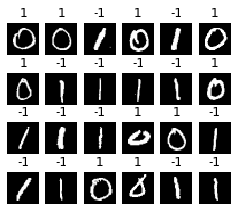

In [47]:
plt.figure(figsize=(4, 3.5))
for n in range(24):
    a = plt.subplot(4,6, n+1)
    plt.imshow(test_x[n].reshape(28,28),
               interpolation="None",
               cmap='gray')
    a.set_title(test_y[n])
    plt.axis('off')
plt.show()

## Barrier Interior point algorithm

In [ ]:
# Gaussian
param = 0.01 #lower is bigger std
C = 2 #controls the balance between the margin and empirical loss
mu = 4

# Line search hyperparameters
rho = 0.5
t_0 = 10000 #no difference between 1000 and 10000
tol = 1e-7 #no diffrence between 1e-5 and 1e-7
c = 1e-4 

Barrier_SVM_Classifier(train_x, train_y, test_x, test_y, "Barrier", "Gaussian", "Hard", param, tol, C, rho, c, mu, t_0)
Barrier_SVM_Classifier(train_x, train_y, test_x, test_y, "Barrier", "Gaussian", "Soft", param, tol, C, rho, c, mu, t_0)

In [ ]:
# Polynomial
param = 1.5 #1 #0.1 #0.0001
C = 1 #controls the balance between the margin and empirical loss
mu = 4

# Line search hyperparameters
c = 1e-4 
rho = 0.5
t_0 = 10000
tol = 1e-10 #1e-10>1and0 worked #1e-8 

Barrier_SVM_Classifier(train_x, train_y, test_x, test_y, "Barrier", "Polynomial", "Hard", param, tol, C, rho, c, mu, t_0)
Barrier_SVM_Classifier(train_x, train_y, test_x, test_y, "Barrier", "Polynomial", "Soft", param, tol, C, rho, c, mu, t_0)

## SMO Algorithm

In [ ]:
# Shared hyperparameters

tol = 0.0005
max_passes = 2

# Gaussian
param = 0.01 #2
C = 1e10 #float("inf")
SMO_SVM_Classifier(C, tol, max_passes, train_x, train_y, test_x, test_y, "SMO", "Gaussian", "Hard", param)
C = 2
SMO_SVM_Classifier(C, tol, max_passes, train_x, train_y, test_x, test_y, "SMO", "Gaussian", "Soft", param)

In [ ]:
# Polynomial
tol = 0.9 #0.005
max_passes = 2


param = 0.01

C = 100 #1e10 #float("inf")
SMO_SVM_Classifier(C, tol, max_passes, train_x, train_y, test_x, test_y, "Hard", "Polynomial", "Hard", param)
C = 1
SMO_SVM_Classifier(C, tol, max_passes, train_x, train_y, test_x, test_y, "Soft", "Polynomial", "Soft", param)
